import all the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score

upload the dataset and set the path

In [ ]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

lets drop the unnecesary columns

In [ ]:
df.drop(["Year","Status","Country"],axis=1,inplace=True)

In [ ]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
missing_values = df.isnull().sum()  #missing values in the dataset
print(missing_values) # print the missing values count

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
df_filled = df.fillna(df.mean()) #fill misisng values using median of columns
print("\nMissing values after imputation:")
print(df_filled.isnull().sum())


Missing values after imputation:
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


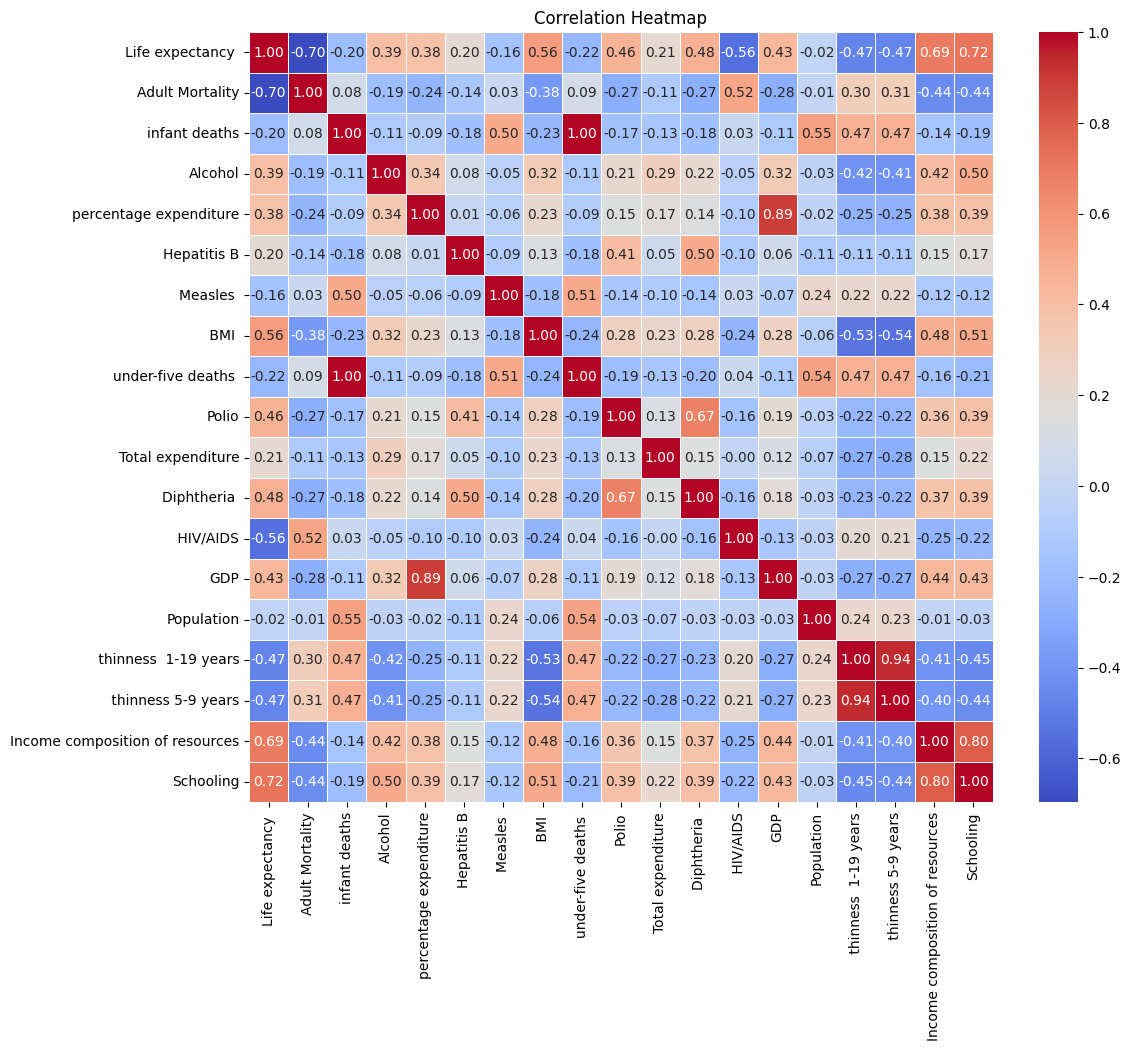

In [ ]:
correlation_matrix = df_filled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

to avoid multicolinearity lets drop the highly correlated columns

In [ ]:
df_filled.drop(["infant deaths"," thinness 5-9 years","Income composition of resources"],axis=1,inplace=True)

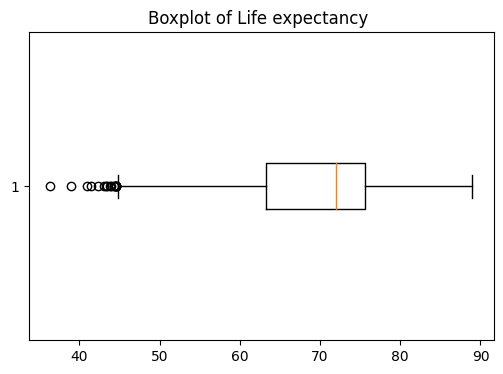

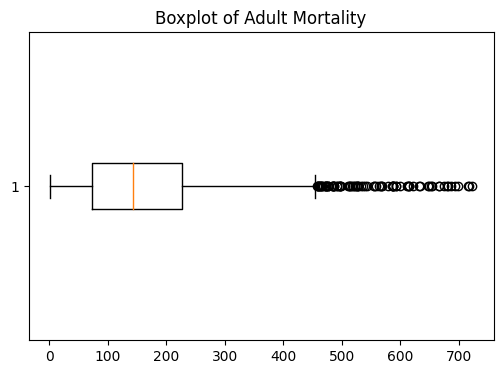

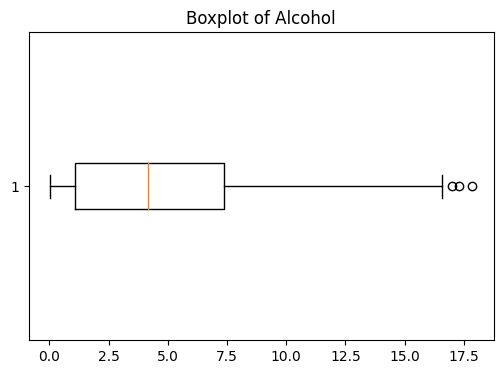

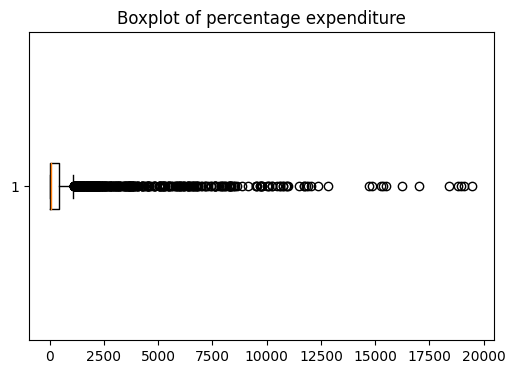

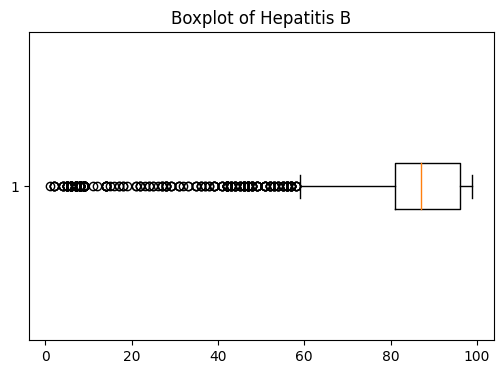

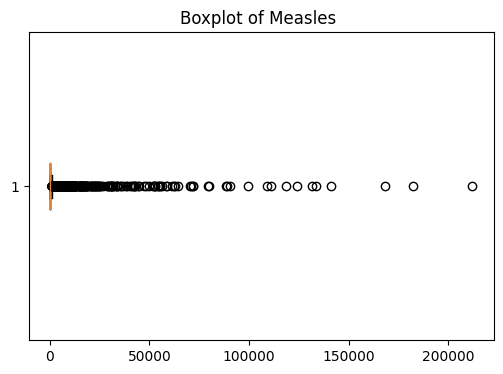

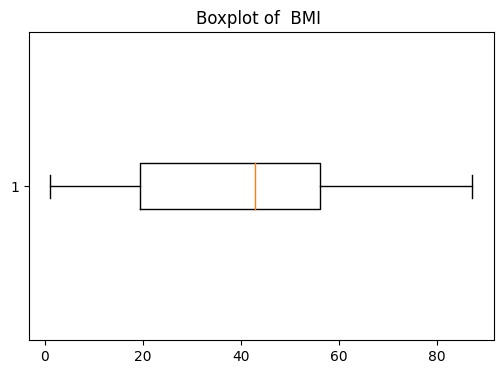

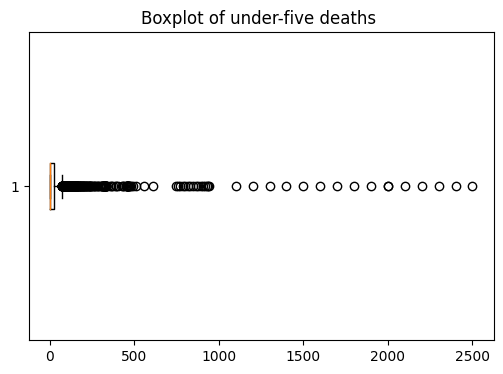

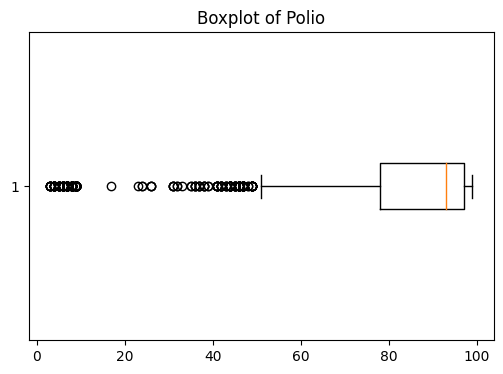

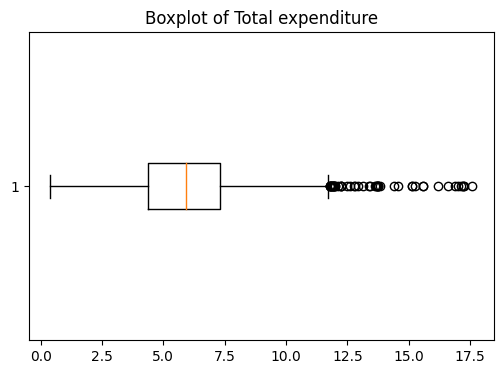

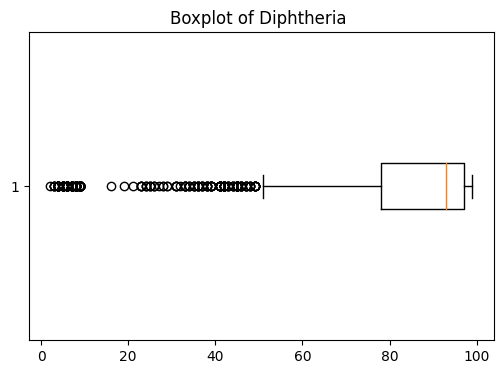

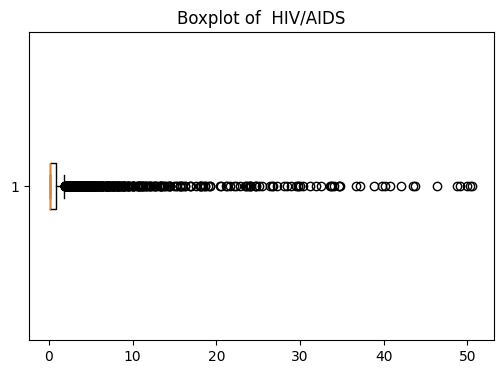

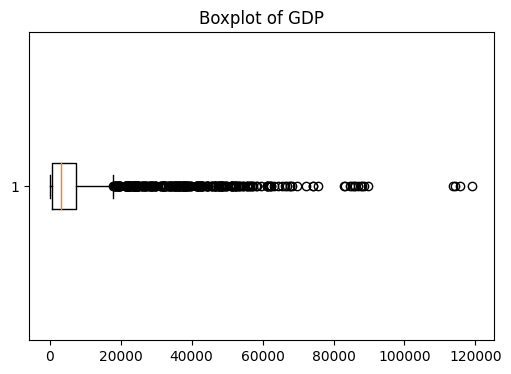

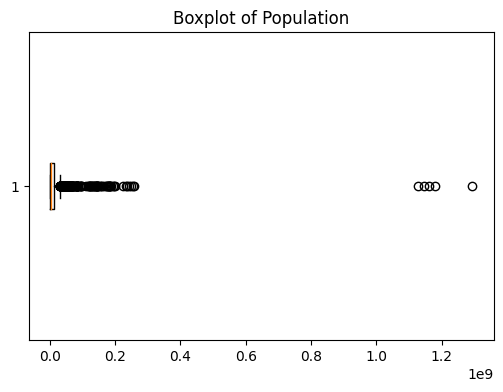

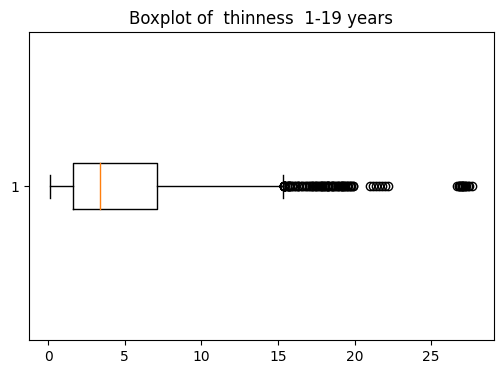

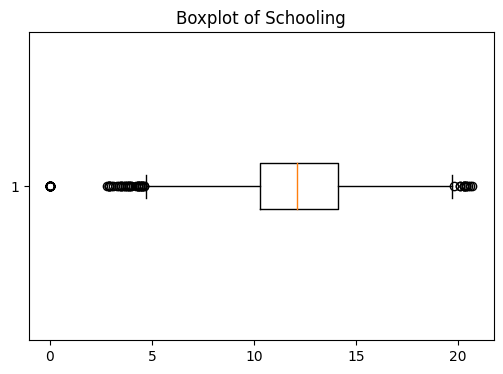

In [ ]:
numerical_columns = df_filled.select_dtypes(include='number').columns
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df_filled[column], vert=False)
    plt.title(f'Boxplot of {column}')
    plt.show()


lets remove the outliers

In [ ]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_removed = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    num_outliers_removed = data.shape[0] - outliers_removed.shape[0]
    return outliers_removed, num_outliers_removed

for column in numerical_columns:
    df_filled, num_outliers_removed = remove_outliers(df_filled, column)


In [ ]:
df_filled.columns

Index(['Life expectancy ', 'Adult Mortality', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', 'Schooling'],
      dtype='object')

In [ ]:
target_variable = 'Life expectancy '
features = numerical_columns.drop(target_variable)

In [ ]:
X = df_filled[features]
y = df_filled[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
y_pred_linear_reg = linear_reg_model.predict(X_test_scaled)

# Evaluate the model
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
print(f"Mean Squared Error (Linear Regression): {mse_linear_reg}")

r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
print(f"R-squared (Linear Regression): {r2_linear_reg}")

Mean Squared Error (Linear Regression): 10.59924668406436
R-squared (Linear Regression): 0.48554393128296325


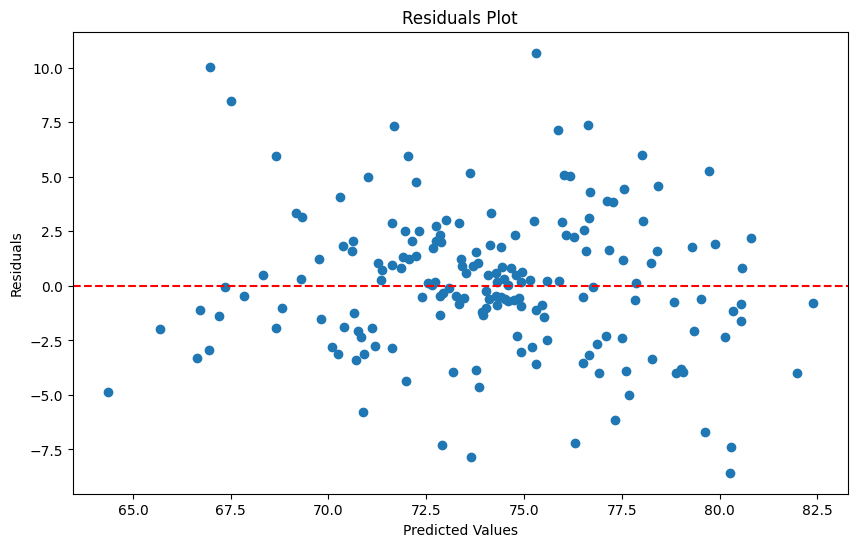

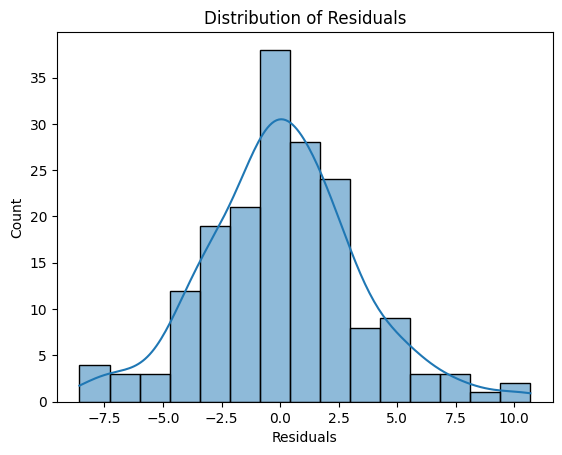

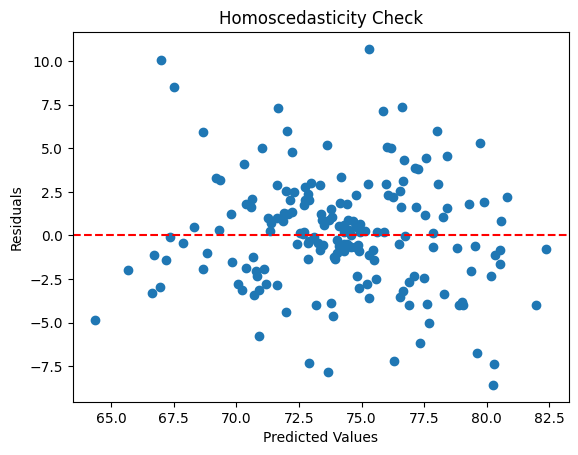

In [ ]:
# Residuals plot
residuals = y_test - y_pred_linear_reg
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear_reg, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Normality of residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# Homoscedasticity (constant variance of residuals)
plt.scatter(y_pred_linear_reg, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Homoscedasticity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
X_train_scaled = sm.add_constant(X_train_scaled)
multiple_linear_reg_model = sm.OLS(y_train, X_train_scaled).fit()
print(multiple_linear_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     57.47
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          6.73e-111
Time:                        21:00:28   Log-Likelihood:                -1790.5
No. Observations:                 712   AIC:                             3613.
Df Residuals:                     696   BIC:                             3686.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.8745      0.113    651.436      0.0

# Predictions on the test set for multiple linear regression

In [ ]:
X_test_scaled = sm.add_constant(X_test_scaled)
y_pred_multiple_linear_reg = multiple_linear_reg_model.predict(X_test_scaled)

mse_multiple_linear_reg = mean_squared_error(y_test, y_pred_multiple_linear_reg)
print(f"Mean Squared Error (Multiple Linear Regression): {mse_multiple_linear_reg}")

Mean Squared Error (Multiple Linear Regression): 10.599246684064349


# Residuals plot

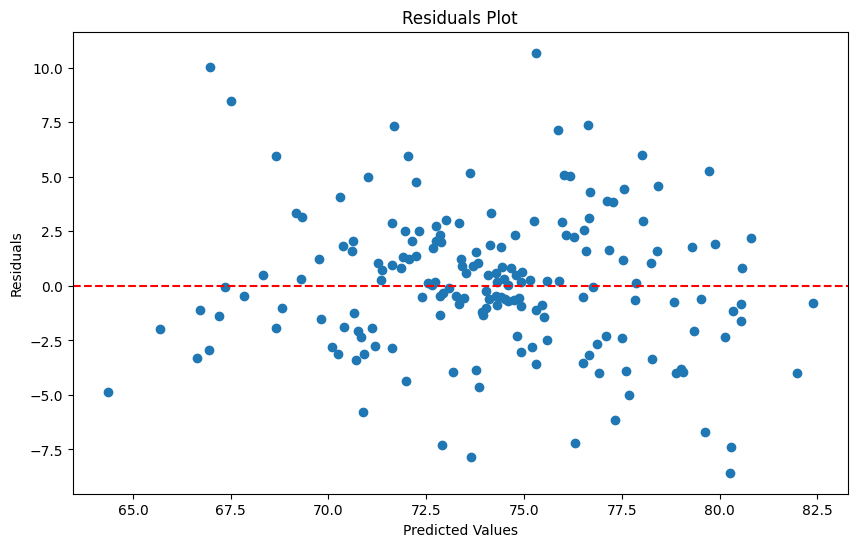

In [ ]:
residuals = y_test - y_pred_multiple_linear_reg
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multiple_linear_reg, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


# Normality of residuals

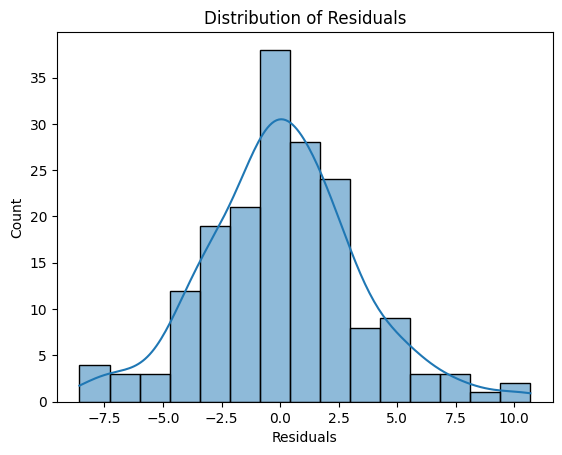

In [ ]:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# Homoscedasticity (constant variance of residuals)

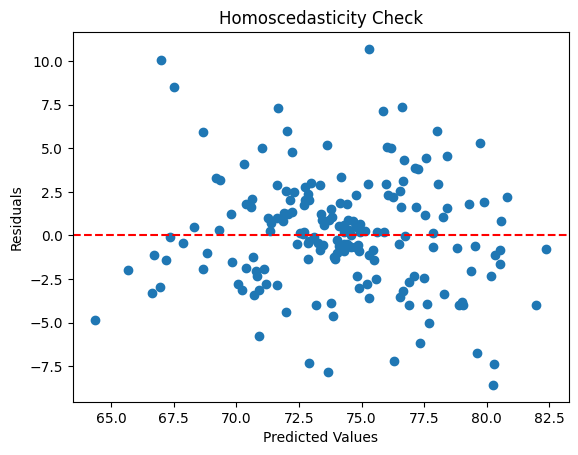

In [ ]:
plt.scatter(y_pred_multiple_linear_reg, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Homoscedasticity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()